In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#### Import Kestrel data and change year to 2015

In [27]:
dtypes=[datetime, float]
kes15 = pd.read_excel('Kestrel_data2015.xlsx',names=['time','ws'],header=3)
kes15['time']=kes15['time'].apply((lambda x: x.replace(year=2015)))


start_date = pd.Timestamp(2015,3,11,12,30,0)
end_date = pd.Timestamp(2015,3,11,13,5,0)
mask1 = (kes15['time'] > start_date) & (kes15['time'] <= end_date)
kes15_1 = kes15.loc[mask1]


start_date = pd.Timestamp(2015,3,11,13,10,0)
end_date = pd.Timestamp(2015,3,11,13,30,0)
mask2=(kes15['time'] > start_date) & (kes15['time'] <= end_date)
kes15_2 = kes15.loc[mask2]


#### Import 2015 Pitot data 

In [28]:
pit15_1 = pd.read_csv('WindTunnelCalibration2015_test1.csv',header=0)
pit15_1.columns = ['time','fan_rpm','air_temp','air_dens','press','ws']
pit15_1['time']=pit15_1['time'].apply((lambda x: pd.to_datetime(x[-5:])))
pit15_1['time']=pit15_1['time'].apply((lambda x: x.replace(year=2015)))
pit15_1['time']=pit15_1['time'].apply((lambda x: x.replace(month=3)))
pit15_1['time']=pit15_1['time'].apply((lambda x: x.replace(day=11)))

In [29]:
pit15_2=pd.read_csv('WindTunnelCalibration2015_test2.csv',header=0)
pit15_2.columns = ['time','fan_rpm','air_temp','air_dens','press','ws']
pit15_2['time']=pit15_2['time'].apply((lambda x: pd.to_datetime(x[-5:])))
pit15_2['time']=pit15_2['time'].apply((lambda x: x.replace(year=2015)))
pit15_2['time']=pit15_2['time'].apply((lambda x: x.replace(month=3)))
pit15_2['time']=pit15_2['time'].apply((lambda x: x.replace(day=11)))
pit15_2.head()

,time,fan_rpm,air_temp,air_dens,press,ws
0,2015-03-11 13:10:00,100,17.1,1.2,20.0,2.6
1,2015-03-11 13:11:00,100,17.1,1.2,20.0,2.6
2,2015-03-11 13:14:00,150,17.2,1.2,45.0,3.8
3,2015-03-11 13:15:00,150,17.2,1.2,45.0,3.8
4,2015-03-11 13:17:00,280,17.1,1.2,NaN,NaN


#### Import 2015 Sonic data 

In [30]:
son15 = pd.read_csv('2015_sonic_1230_start.txt', sep=",", header=None)
son15.columns = ['gu','gv','gw','sound_speed','temp']
N=len(son15)
freq= 10   #Hz
dt= str(1/freq)+'S'   #seconds 
start_time=pd.Timestamp(2015,3,11,12,30,0.0)
time = pd.date_range(start = start_time,periods=N,freq=dt)
son15.insert(0,'time',time,True)
son15 = son15[son15.gu < 20]
son15 = son15[son15.gv < 20]

#### Convert Gill to Met

In [31]:
def convert_gill_to_met(gu,gv,gw):
    w = [x for x in gw]
    u = [-x for x in gv]
    v = [x for x in gu]
    
    return [u,v,w]


def mean_horizontal_wind(u,v):
    mean_winds=[]
    for i in range(len(u)):
        M = np.sqrt((u[i])**2 + (v[i])**2)
        mean_winds.append(M)
    return mean_winds

In [32]:
met_dirs15 = convert_gill_to_met(son15['gu'],son15['gv'],son15['gw'])
u15=met_dirs15[0]
v15=met_dirs15[1]
w15=met_dirs15[2]
M15 = mean_horizontal_wind(u15,v15)
son15.insert(1,'u',u15,True)
son15.insert(2,'v',v15,True)
son15.insert(3,'w',w15,True)
son15.insert(4,'mean_wind',M15,True)
son15.head()

,time,u,v,w,mean_wind,gu,gv,gw,sound_speed,temp
0,2015-03-11 12:30:00.000,2.10,-0.08,0.01,2.101523,-0.08,-2.10,0.01,343.95,20.56
1,2015-03-11 12:30:00.100,2.12,-0.09,0.01,2.121910,-0.09,-2.12,0.01,343.95,20.56
2,2015-03-11 12:30:00.200,2.12,-0.10,0.01,2.122357,-0.10,-2.12,0.01,343.96,20.57
3,2015-03-11 12:30:00.300,2.13,-0.12,0.01,2.133378,-0.12,-2.13,0.01,343.96,20.57
4,2015-03-11 12:30:00.400,2.14,-0.14,0.01,2.144575,-0.14,-2.14,0.01,343.97,20.59


In [33]:
start_date = pd.Timestamp(2015,3,11,12,30,0)
end_date = pd.Timestamp(2015,3,11,13,5,0)
mask1 = (son15['time'] > start_date) & (son15['time'] <= end_date)
son15_1 = son15.loc[mask1]


start_date = pd.Timestamp(2015,3,11,13,10,0)
end_date = pd.Timestamp(2015,3,11,13,30,0)
mask2=(son15['time'] > start_date) & (son15['time'] <= end_date)
son15_2 = son15.loc[mask2]
son15_2.sort_values('mean_wind',ascending=False)
son15_2 = son15_2.drop(25527)
son15_2 = son15_2.drop(34739)

#### Plot wind trace for test 1 2015

Text(0.5,1,'Wind Speed Traces Test 1 2015')

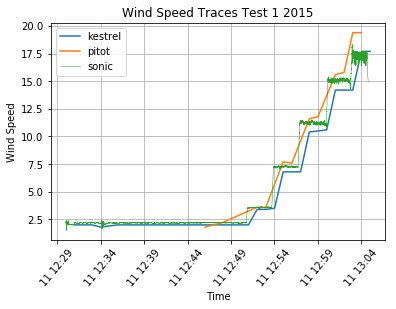

In [34]:
plt.plot(kes15_1['time'],kes15_1['ws'])
plt.plot(pit15_1['time'],pit15_1['ws'])
plt.plot(son15_1['time'],son15_1['mean_wind'],linewidth =0.51)
plt.legend(['kestrel','pitot','sonic'])
plt.xticks(rotation=50)
plt.grid()
plt.ylabel('Wind Speed')
plt.xlabel('Time')
plt.title('Wind Speed Traces Test 1 2015')

Text(0.5,1,'Wind Speed Traces Test 2 2015')

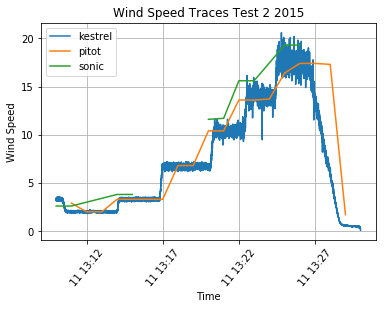

In [35]:
plt.plot(son15_2['time'],son15_2['mean_wind'])
plt.plot(kes15_2['time'],kes15_2['ws'])
plt.plot(pit15_2['time'],pit15_2['ws'])
plt.legend(['kestrel','pitot','sonic'])
plt.xticks(rotation=50)
plt.grid()
plt.ylabel('Wind Speed')
plt.xlabel('Time')
plt.title('Wind Speed Traces Test 2 2015')

12

#### Sonic 1 min average average

In [36]:
son15_1.index = pd.DatetimeIndex(son15_1.time)
avg_time = '60S'
u = (son15_1['u'].resample(avg_time).mean())
v = (son15_1['v'].resample(avg_time).mean())
w = (son15_1['w'].resample(avg_time).mean())
mean_wind = (son15_1['mean_wind'].resample(avg_time).mean())
gu = (son15_1['gu'].resample(avg_time).mean())
gv = (son15_1['gv'].resample(avg_time).mean())
gw = (son15_1['gw'].resample(avg_time).mean())
sound_speed = (son15_1['sound_speed'].resample(avg_time).mean())
temp = (son15_1['temp'].resample(avg_time).mean())
data = {'u':u,
        'v':v,
        'w':w,
        'mean_wind':mean_wind,
        'gu':gu, 
        'gv':gv,
        'gw':gw,
        'sound_speed':sound_speed,
        'temp':temp} 
son15_1_avg=pd.DataFrame(data)
son15_1_avg.head()

,u,v,w,mean_wind,gu,gv,gw,sound_speed,temp
time,,,,,,,,,
2015-03-11 12:30:00,2.083289,-0.088497,0.012254,2.085871,-0.088497,-2.083289,0.012254,343.948915,20.553673
2015-03-11 12:31:00,2.174317,0.023300,0.020400,2.174467,0.023300,-2.174317,0.020400,343.755367,20.223983
2015-03-11 12:32:00,2.189800,0.023533,0.013133,2.189953,0.023533,-2.189800,0.013133,343.572267,19.911783
2015-03-11 12:33:00,2.178250,0.021450,0.019467,2.178387,0.021450,-2.178250,0.019467,343.572033,19.911183
2015-03-11 12:34:00,2.141067,-0.003800,0.006783,2.141911,-0.003800,-2.141067,0.006783,343.646567,20.038400


In [37]:
son15_2.index = pd.DatetimeIndex(son15_2.time)
avg_time = '60S'
u = (son15_2['u'].resample(avg_time).mean())
v = (son15_2['v'].resample(avg_time).mean())
w = (son15_2['w'].resample(avg_time).mean())
mean_wind = (son15_2['mean_wind'].resample(avg_time).mean())
gu = (son15_2['gu'].resample(avg_time).mean())
gv = (son15_2['gv'].resample(avg_time).mean())
gw = (son15_2['gw'].resample(avg_time).mean())
sound_speed = (son15_2['sound_speed'].resample(avg_time).mean())
temp = (son15_2['temp'].resample(avg_time).mean())
data = {'u':u,
        'v':v,
        'w':w,
        'mean_wind':mean_wind,
        'gu':gu, 
        'gv':gv,
        'gw':gw,
        'sound_speed':sound_speed,
        'temp':temp} 
son15_2_avg=pd.DataFrame(data)
son15_2_avg.head()

,u,v,w,mean_wind,gu,gv,gw,sound_speed,temp
time,,,,,,,,,
2015-03-11 13:10:00,0.088698,-2.684591,0.023957,2.688993,-2.684591,-0.088698,0.023957,343.426093,19.660134
2015-03-11 13:11:00,0.072433,-2.000350,0.021217,2.002844,-2.000350,-0.072433,0.021217,343.428317,19.664700
2015-03-11 13:12:00,0.066277,-2.007062,0.019499,2.009439,-2.007062,-0.066277,0.019499,343.479633,19.752705
2015-03-11 13:13:00,0.067667,-2.002217,0.023367,2.004590,-2.002217,-0.067667,0.023367,343.522017,19.824517
2015-03-11 13:14:00,0.109683,-3.184967,0.028033,3.191088,-3.184967,-0.109683,0.028033,343.487933,19.762933


In [40]:
print(len(pit15_1))
len(son15_2_avg)

12


20

#### Import 2020 Kestrel data 

In [12]:
kes20 = pd.read_csv('kestrel_2020.csv',names=['time','ws'],header=0)
kes20['time'] = pd.to_datetime(kes20['time'])
start_date = pd.Timestamp(2020,3,6,11,50,0)
end_date = pd.Timestamp(2020,3,6,12,15,37)
mask1 = (kes20['time'] > start_date) & (kes20['time'] <= end_date)
kes20 = kes20.loc[mask1]


#### Import 2020 Sonic data 

In [13]:
son20 = pd.read_csv('sonic_2020.csv', header=None)
son20.columns = ['gu','gv','gw','sound_speed','temp']
N=len(son20)
freq= 10   #Hz
dt= str(1/freq)+'S'   #seconds 


start_time=pd.Timestamp(2020,3,6,11,50,0)
time = pd.date_range(start = start_time,periods=N,freq=dt)
son20.insert(0,'time',time,True)
met_dirs20 = convert_gill_to_met(son20['gu'],son20['gv'],son20['gw'])
u20=met_dirs20[0]
v20=met_dirs20[1]
w20=met_dirs20[2]
M20 = mean_horizontal_wind(u20,v20)

son20.insert(1,'u',u20,True)
son20.insert(2,'v',v20,True)
son20.insert(3,'w',w20,True)
son20.insert(4,'mean_wind',M20,True)

son20.sort_values('mean_wind',ascending=False).head()
son20 = son20.drop(13879)
son20 = son20.drop(15580)
son20 = son20.drop(3415)
son20 = son20.drop(14271)
son20 = son20.drop(9264)
son20 = son20.drop(12100)

start_date = pd.Timestamp(2020,3,6,11,50,0)
end_date = pd.Timestamp(2020,3,6,12,15,37)
mask2=(son20['time'] > start_date) & (son20['time'] <= end_date)
son20 = son20.loc[mask2]

#### Plot wind trace for test 2 2020

Text(0.5,1,'Wind Speed Traces Test 2 2020')

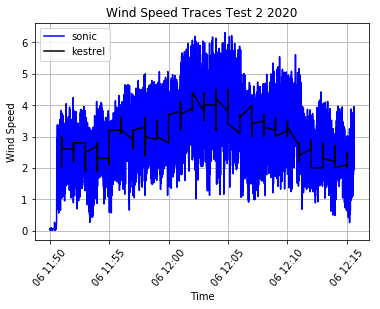

In [14]:
plt.plot(son20['time'],son20['mean_wind'],c='b')
plt.plot(kes20['time'],kes20['ws'],c='k')
plt.legend(['sonic','kestrel'])
plt.xticks(rotation=50)
plt.grid()
plt.ylabel('Wind Speed')
plt.xlabel('Time')
plt.title('Wind Speed Traces Test 2 2020')


In [15]:
def find_alpha(u,v):
    dirs=[]
    for i in np.arange(len(u)):
        
        if u.iloc[i] > 0.0:
            alpha = 90 - np.arctan(v.iloc[i]/u.iloc[i])+180
        else:
            alpha = 90 - np.arctan(v.iloc[i]/u.iloc[i])

        dirs.append(alpha)

    return dirs

np.mean(find_alpha(son20['u'],son20['v']))

90.8351366961003

#### Average Kestrel and Sonic data

In [22]:
kes20 = pd.read_csv('kestrel_2020.csv',names=['time','ws'],header=0)
kes20['time'] = pd.to_datetime(kes20['time'])

## OFF TO LOW
end_date = pd.Timestamp(2020,3,6,11,50,0)
mask1 = (kes20['time'] <= end_date)
kes20_1 = kes20.loc[mask1]


kes20_1.index = pd.DatetimeIndex(kes20_1.time)
avg_time = '60S'
ws = (kes20_1['ws'].resample(avg_time).mean())
data = {'ws':ws} 
kes20_avg_1=pd.DataFrame(data)
kes20_avg_1

## LOW TO OFF
start_date = pd.Timestamp(2020,3,6,12,10,35)
end_date = pd.Timestamp(2020,3,6,12,15,37)
mask2 = (kes20['time'] > start_date) & (kes20['time'] <= end_date)
kes20_2 = kes20.loc[mask2]


kes20_2.index = pd.DatetimeIndex(kes20_2.time)
avg_time = '60S'
ws = (kes20_2['ws'].resample(avg_time).mean())
data = {'ws':ws} 
kes20_avg_2=pd.DataFrame(data)
kes20_avg_1

,ws
time,
2020-03-06 11:49:00,0.000000
2020-03-06 11:49:10,NaN
2020-03-06 11:49:20,NaN
2020-03-06 11:49:30,NaN
2020-03-06 11:49:40,NaN
2020-03-06 11:49:50,NaN
2020-03-06 11:50:00,1.316667


In [17]:
son20.index = pd.DatetimeIndex(son20.time)
avg_time = '60S'
u = (son20['u'].resample(avg_time).mean())
v = (son20['v'].resample(avg_time).mean())
w = (son20['w'].resample(avg_time).mean())
mean_wind = (son20['mean_wind'].resample(avg_time).mean())
gu = (son20['gu'].resample(avg_time).mean())
gv = (son20['gv'].resample(avg_time).mean())
gw = (son20['gw'].resample(avg_time).mean())
sound_speed = (son20['sound_speed'].resample(avg_time).mean())
temp = (son20['temp'].resample(avg_time).mean())

data = {'u':u,
        'v':v,
        'w':w,
        'mean_wind':mean_wind,
        'gu':gu, 
        'gv':gv,
        'gw':gw,
        'sound_speed':sound_speed,
        'temp':temp} 
son20_avg=pd.DataFrame(data)









kes20 = pd.read_csv('kestrel_2020.csv',names=['time','ws'],header=0)
kes20['time'] = pd.to_datetime(kes20['time'])

## OFF TO LOW
end_date = pd.Timestamp(2020,3,6,11,50,0)
mask1 = (kes20['time'] <= end_date)
kes20_1 = kes20.loc[mask1]


kes20_1.index = pd.DatetimeIndex(kes20_1.time)
avg_time = '60S'
ws = (kes20_1['ws'].resample(avg_time).mean())
data = {'ws':ws} 
kes20_avg_1=pd.DataFrame(data)
kes20_avg_1

## LOW TO OFF
start_date = pd.Timestamp(2020,3,6,12,10,35)
end_date = pd.Timestamp(2020,3,6,12,15,37)
mask2 = (kes20['time'] > start_date) & (kes20['time'] <= end_date)
kes20_2 = kes20.loc[mask2]


kes20_2.index = pd.DatetimeIndex(kes20_2.time)
avg_time = '60S'
ws = (kes20_2['ws'].resample(avg_time).mean())
data = {'ws':ws} 
kes20_avg_2=pd.DataFrame(data)
kes20_avg_1

,u,v,w,mean_wind,gu,gv,gw,sound_speed,temp
time,,,,,,,,,
2020-03-06 11:50:00,-0.794925,-0.179967,-0.063756,0.872782,-0.179967,0.794925,-0.063756,345.114157,22.540835
2020-03-06 11:51:00,-2.398333,-0.442833,-0.079200,2.489221,-0.442833,2.398333,-0.079200,345.121167,22.558767
2020-03-06 11:52:00,-2.438883,-0.460700,-0.070033,2.525843,-0.460700,2.438883,-0.070033,345.119933,22.557000
2020-03-06 11:53:00,-1.967933,-0.454200,-0.162050,2.077687,-0.454200,1.967933,-0.162050,345.114150,22.545450
2020-03-06 11:54:00,-2.524417,-0.509833,-0.050100,2.619920,-0.509833,2.524417,-0.050100,345.138100,22.587917
